<a href="https://colab.research.google.com/github/ledyquesada/Ejercicios/blob/main/ISemana12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelado de Tendencias y Estacionalidades en Series Temporales

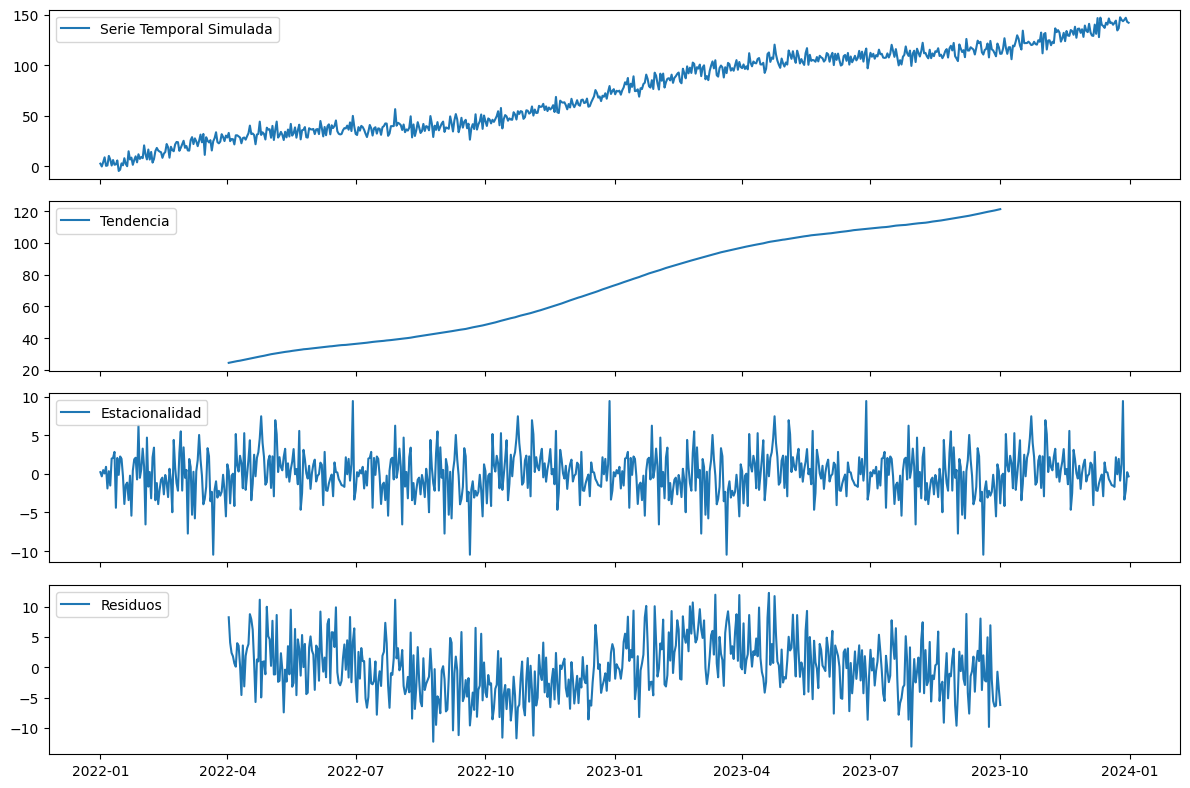

In [3]:
#STL

import numpy as np
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Crear una serie temporal simulada con tendencia y estacionalidad
np.random.seed(42)
tiempo = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')  # Datos para dos años
tendencia = 0.2 * np.arange(len(tiempo))
estacionalidad = 10 * np.sin(2 * np.pi * (tiempo.dayofyear) / 365)

serie_temporal_simulada = tendencia + estacionalidad + np.random.normal(scale=5, size=len(tiempo))

# Aplicar la descomposición STL con un periodo de estacionalidad de 182 (mitad de 365)
resultados = sm.tsa.seasonal_decompose(serie_temporal_simulada, period=182)

# Visualizar las componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

ax1.plot(tiempo, serie_temporal_simulada, label='Serie Temporal Simulada')
ax1.legend(loc='upper left')

ax2.plot(tiempo, resultados.trend, label='Tendencia')
ax2.legend(loc='upper left')

ax3.plot(tiempo, resultados.seasonal, label='Estacionalidad')
ax3.legend(loc='upper left')

ax4.plot(tiempo, resultados.resid, label='Residuos')
ax4.legend(loc='upper left')

plt.tight_layout()
plt.show()


**MODELADOS AVANZADOS PARA SERIES TEMPORALES**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


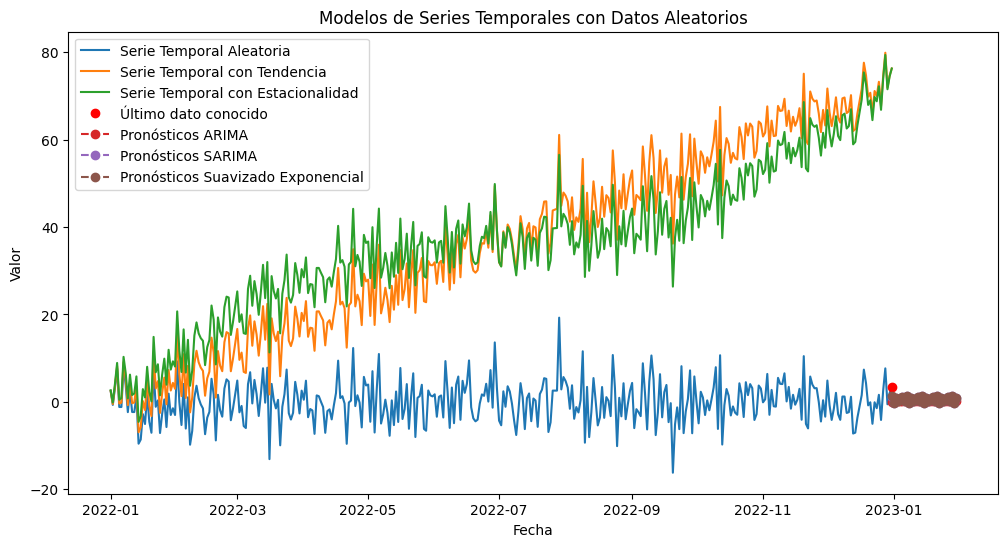

In [4]:
#Ejemplo completo

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Generar datos de serie temporal aleatoria
np.random.seed(42)
fecha_inicio = '2022-01-01'
fecha_fin = '2022-12-31'
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='D')
serie_temporal_aleatoria = np.random.normal(loc=0, scale=5, size=len(rango_fechas))

# Agregar tendencia a la serie temporal
tendencia = 0.2 * np.arange(len(rango_fechas))
serie_temporal_tendencia = serie_temporal_aleatoria + tendencia

# Agregar estacionalidad a la serie temporal
estacionalidad = 10 * np.sin(2 * np.pi * (rango_fechas.dayofyear) / 365)
serie_temporal_estacional = serie_temporal_tendencia + estacionalidad

# Modelo ARIMA
modelo_arima = ARIMA(serie_temporal_aleatoria, order=(1, 1, 1))
ajuste_arima = modelo_arima.fit()
pronosticos_arima = ajuste_arima.predict(start=len(serie_temporal_aleatoria), end=len(serie_temporal_aleatoria) + 30, typ='levels')

# Modelo SARIMA
modelo_sarima = SARIMAX(serie_temporal_aleatoria, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
ajuste_sarima = modelo_sarima.fit()
pronosticos_sarima = ajuste_sarima.predict(start=len(serie_temporal_aleatoria), end=len(serie_temporal_aleatoria) + 30, typ='levels')

# Modelo de suavizado exponencial
modelo_exponential = ExponentialSmoothing(serie_temporal_aleatoria, trend='add', seasonal='add', seasonal_periods=7)
ajuste_exponential = modelo_exponential.fit()
pronosticos_exponential = ajuste_exponential.predict(start=len(serie_temporal_aleatoria), end=len(serie_temporal_aleatoria) + 30)

# Visualizar resultados
plt.figure(figsize=(12, 6))

plt.plot(rango_fechas, serie_temporal_aleatoria, label='Serie Temporal Aleatoria')
plt.plot(rango_fechas, serie_temporal_tendencia, label='Serie Temporal con Tendencia')
plt.plot(rango_fechas, serie_temporal_estacional, label='Serie Temporal con Estacionalidad')

plt.plot(rango_fechas[-1:], serie_temporal_aleatoria[-1:], 'ro', label='Último dato conocido')
plt.plot(pd.date_range(start=rango_fechas[-1], periods=31, freq='D'), pronosticos_arima, label='Pronósticos ARIMA', linestyle='dashed', marker='o')
plt.plot(pd.date_range(start=rango_fechas[-1], periods=31, freq='D'), pronosticos_sarima, label='Pronósticos SARIMA', linestyle='dashed', marker='o')
plt.plot(pd.date_range(start=rango_fechas[-1], periods=31, freq='D'), pronosticos_exponential, label='Pronósticos Suavizado Exponencial', linestyle='dashed', marker='o')

plt.title('Modelos de Series Temporales con Datos Aleatorios')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()


**Ejemplo práctico 1**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


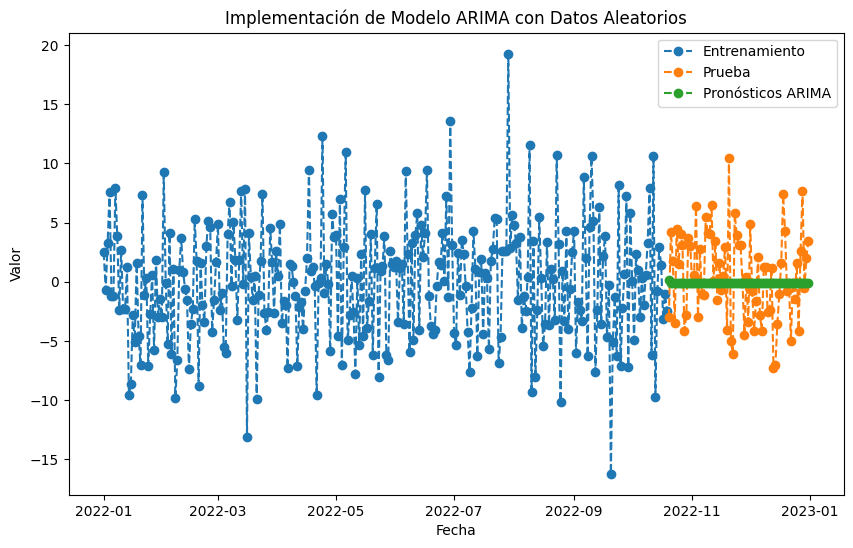

RMSE del modelo ARIMA: 3.769468443691036


In [5]:
#Importar
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generar datos de serie temporal aleatoria
np.random.seed(42)
fecha_inicio = '2022-01-01'
fecha_fin = '2022-12-31'
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='D')
serie_temporal_real = np.random.normal(loc=0, scale=5, size=len(rango_fechas))

# Dividir en entrenamiento y prueba
porcentaje_entrenamiento = 0.8
indice_entrenamiento = int(len(serie_temporal_real) * porcentaje_entrenamiento)

train_data = serie_temporal_real[:indice_entrenamiento]
test_data = serie_temporal_real[indice_entrenamiento:]

# Ajustar el modelo ARIMA
modelo_arima = ARIMA(train_data, order=(1, 1, 1))
ajuste_arima = modelo_arima.fit()

# Realizar pronósticos
pronosticos_arima = ajuste_arima.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(rango_fechas[:indice_entrenamiento], train_data, label='Entrenamiento', linestyle='dashed', marker='o')
plt.plot(rango_fechas[indice_entrenamiento:], test_data, label='Prueba', linestyle='dashed', marker='o')
plt.plot(rango_fechas[indice_entrenamiento:], pronosticos_arima, label='Pronósticos ARIMA', linestyle='dashed', marker='o')
plt.title('Implementación de Modelo ARIMA con Datos Aleatorios')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Evaluar la precisión del modelo
rmse_arima = np.sqrt(mean_squared_error(test_data, pronosticos_arima))
print(f'RMSE del modelo ARIMA: {rmse_arima}')


**Ejemplo practico II**

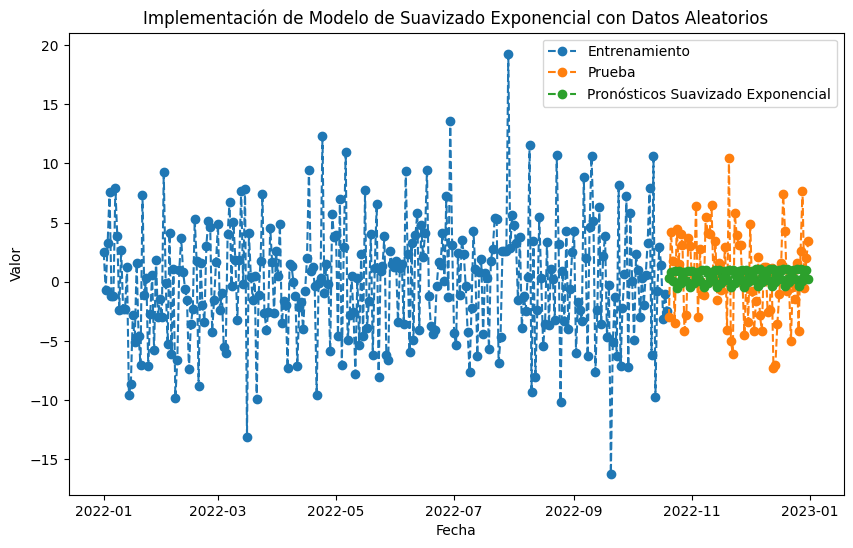

RMSE del modelo de Suavizado Exponencial: 3.724852942206745


In [6]:
#Ejemplo 2
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ajustar el modelo de suavizado exponencial
modelo_exponential = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=7)
ajuste_exponential = modelo_exponential.fit()

# Realizar pronósticos
pronosticos_exponential = ajuste_exponential.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(rango_fechas[:indice_entrenamiento], train_data, label='Entrenamiento', linestyle='dashed', marker='o')
plt.plot(rango_fechas[indice_entrenamiento:], test_data, label='Prueba', linestyle='dashed', marker='o')
plt.plot(rango_fechas[indice_entrenamiento:], pronosticos_exponential, label='Pronósticos Suavizado Exponencial', linestyle='dashed', marker='o')
plt.title('Implementación de Modelo de Suavizado Exponencial con Datos Aleatorios')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Evaluar la precisión del modelo
rmse_exponential = np.sqrt(mean_squared_error(test_data, pronosticos_exponential))
print(f'RMSE del modelo de Suavizado Exponencial: {rmse_exponential}')
